In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy
import copy
import pandas as pd
import seaborn as sns
import csv

# Machine learning package.
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt

print('Finished successfully loading packages')

Finished successfully loading packages


In [2]:
# importing my N-number
import random
random.seed(18618637)

In [3]:
df = pd.read_csv("dataSet/musicData.csv")

In [4]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [5]:
print("Unique key values: ", set(df["key"]))
print("Unique mode values: ", set(df["mode"]))
print("Unique music_genre values: ", set(df["music_genre"]))

Unique key values:  {'F', 'A#', 'E', 'D', 'C#', 'G', 'B', 'A', 'C', 'D#', nan, 'G#', 'F#'}
Unique mode values:  {'Minor', 'Major', nan}
Unique music_genre values:  {'Rap', 'Jazz', 'Hip-Hop', 'Country', 'Alternative', 'Blues', 'Rock', 'Electronic', 'Anime', 'Classical', nan}


In [6]:
nan_counts_per_column = df.isna().sum()
nan_counts_per_column

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data and transform it
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
nan_counts_per_column = df_imputed.isna().sum()
nan_counts_per_column

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [8]:
def count_values_per_col(df: pd.DataFrame, col_name: str, value_to_count: any):
    count_vals = (df_imputed[col_name] == value_to_count).sum()
    return "Number of values equal to {} in '{}' column: {}".format(value_to_count, col_name, count_vals)

count_values_per_col(df_imputed, "duration_ms", -1)

"Number of values equal to -1 in 'duration_ms' column: 4944"

In [9]:
mean_duration = df_imputed.loc[df_imputed['duration_ms'] != -1, 'duration_ms'].mean()
# replace -1 values with the mean
df_imputed.loc[df_imputed['duration_ms'] == -1, 'duration_ms'] = mean_duration

In [10]:
count_values_per_col(df_imputed, "duration_ms", -1)

"Number of values equal to -1 in 'duration_ms' column: 0"

In [11]:
count_values_per_col(df_imputed, "tempo", "?")

"Number of values equal to ? in 'tempo' column: 4985"

In [12]:
df_imputed['tempo'] = df_imputed['tempo'].replace("?", float("NaN"))

df_imputed['tempo'] = df_imputed['tempo'].astype(float)

mean_tempo = df_imputed.loc[~df_imputed['tempo'].isna(), 'tempo'].mean()

# df_imputed['tempo'].fillna(mean_tempo, inplace=True)
df_imputed['tempo'] = df_imputed['tempo'].replace(float("NaN"), mean_tempo)

In [14]:
df_imputed['popularity'] = df['popularity'] / 100

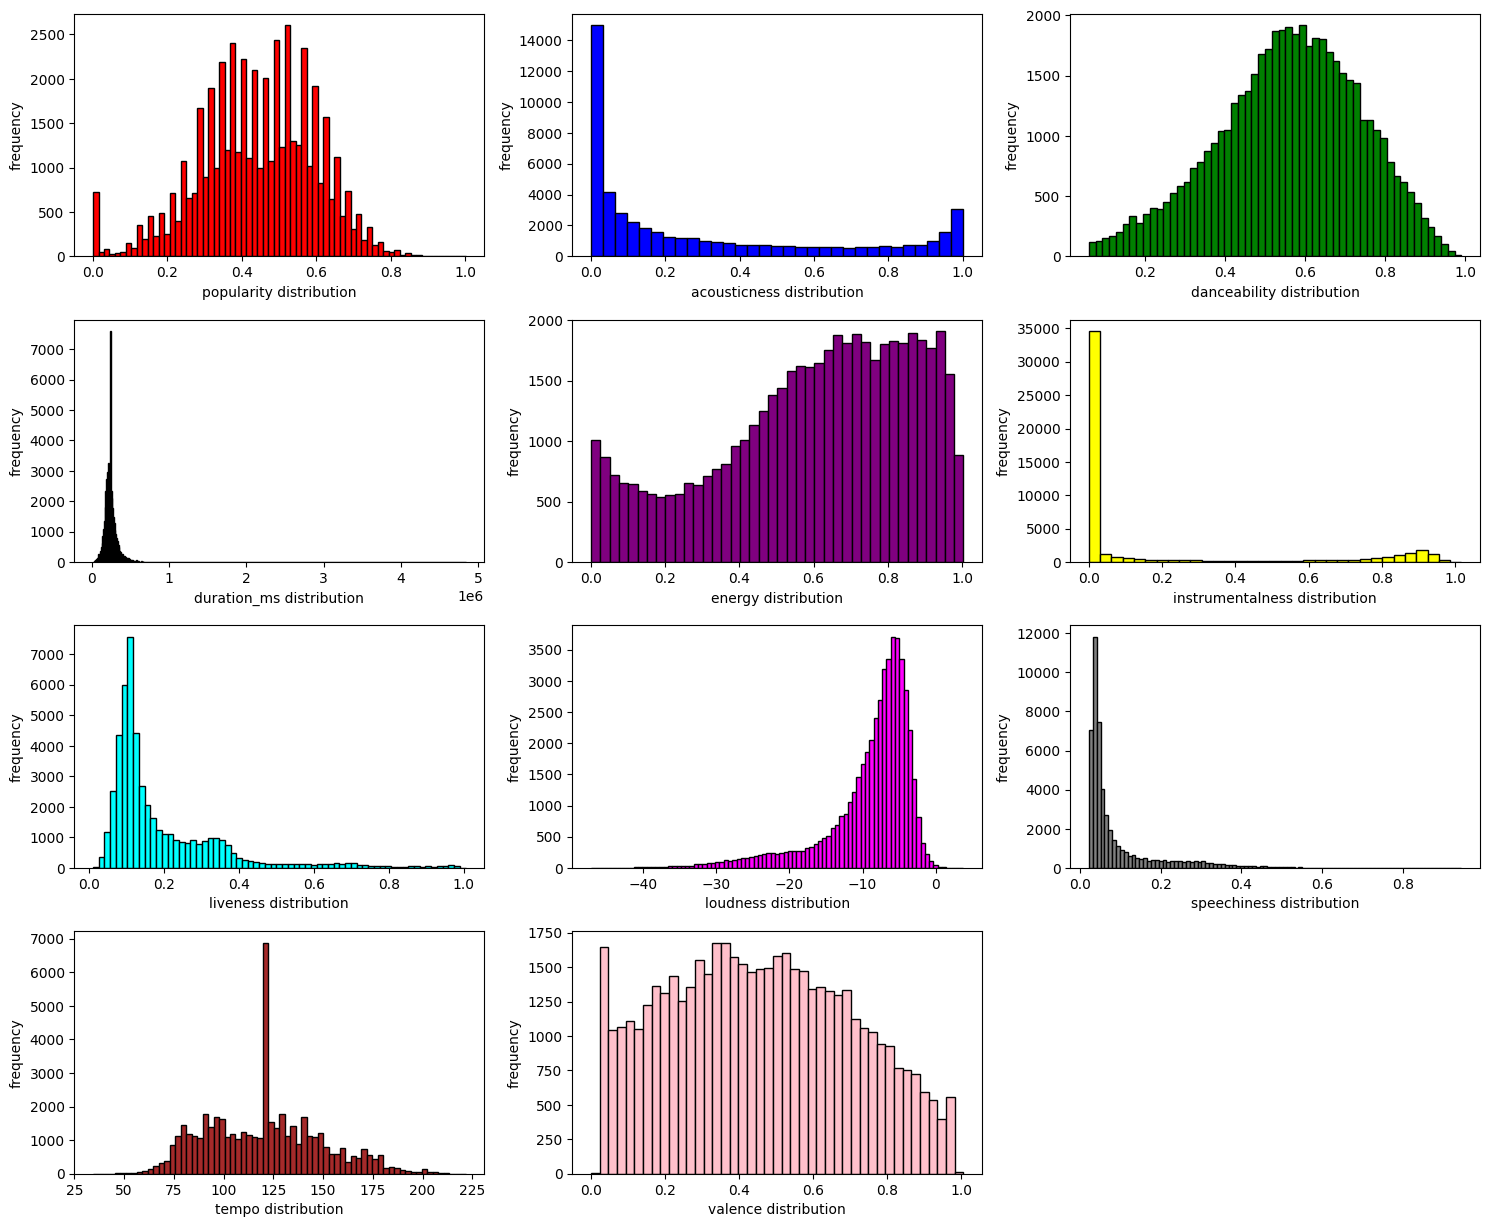

In [15]:
def plot_freq_dist(predictor, dataframe, color: str = "red", ax=None):
    """
    data: 1d dataframe to plot on the graph
    """
    data = dataframe[predictor]
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # define number of bins with accordance to the appropriate size 
    # bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)
    bins = np.arange(data.min(), data.max() + w, w, dtype=float)

    if ax is None:
        ax = plt.gca()
    ax.hist(data, color=color, edgecolor="black", bins=bins) 
    ax.set_xlabel("{} distribution".format(predictor))
    ax.set_ylabel("frequency")


predictors = ["popularity", "acousticness", "danceability", 
              "duration_ms", "energy", "instrumentalness", 
              "liveness", "loudness", "speechiness", 
              "tempo", "valence"]

colors = ['red', 'blue', 'green', 'orange', 'purple',
          'yellow', 'cyan', 'magenta', 'gray', 'brown',
          'pink', 'teal', 'lavender']

num_rows = 5
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, predictor in enumerate(predictors):
    row_index = i // num_cols
    col_index = i % num_cols
    plot_freq_dist(predictor, dataframe=df_imputed, color=colors[i], ax=axes[row_index, col_index])

for i in range(len(predictors), num_rows*num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()